In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import seaborn as sns

In [ ]:
from google.colab import files
import io
upload = files.upload()

Saving data_minuman_energi.csv to data_minuman_energi.csv
Saving data_pelanggan_streaming.csv to data_pelanggan_streaming.csv
Saving data_pembelian_konsumen.csv to data_pembelian_konsumen.csv
Saving data_tanaman.csv to data_tanaman.csv


In [ ]:
data1 = pd.read_csv('data_minuman_energi.csv', sep=';')

In [ ]:
data2 = pd.read_csv('data_tanaman.csv', sep=';')

In [ ]:
data3 = pd.read_csv('data_pelanggan_streaming.csv', sep=';')

In [ ]:
data4 = pd.read_csv('data_pembelian_konsumen.csv', sep=';')

# **Fungsi Densitas Peluang minuman_energi.csv**


In [ ]:
# Menampilkan statistik deskriptif untuk variabel kadar gula, volume, dan pH
statistik = data1[['Kadar Gula', 'Volume', 'pH']].describe().loc[['mean', '50%', 'std', 'min', 'max']]
statistik.rename(index={'50%': 'median', 'std': 'simpangan_baku', 'min': 'min', 'max': 'max'}, inplace=True)
statistik.loc['rentang'] = statistik.loc['max'] - statistik.loc['min']
statistik

,Kadar Gula,Volume,pH
mean,9.000000,249.800000,3.620000
median,8.950000,250.000000,3.600000
simpangan_baku,0.426401,1.255292,0.098473
min,8.400000,248.000000,3.500000
max,10.000000,252.000000,3.800000
rentang,1.600000,4.000000,0.300000


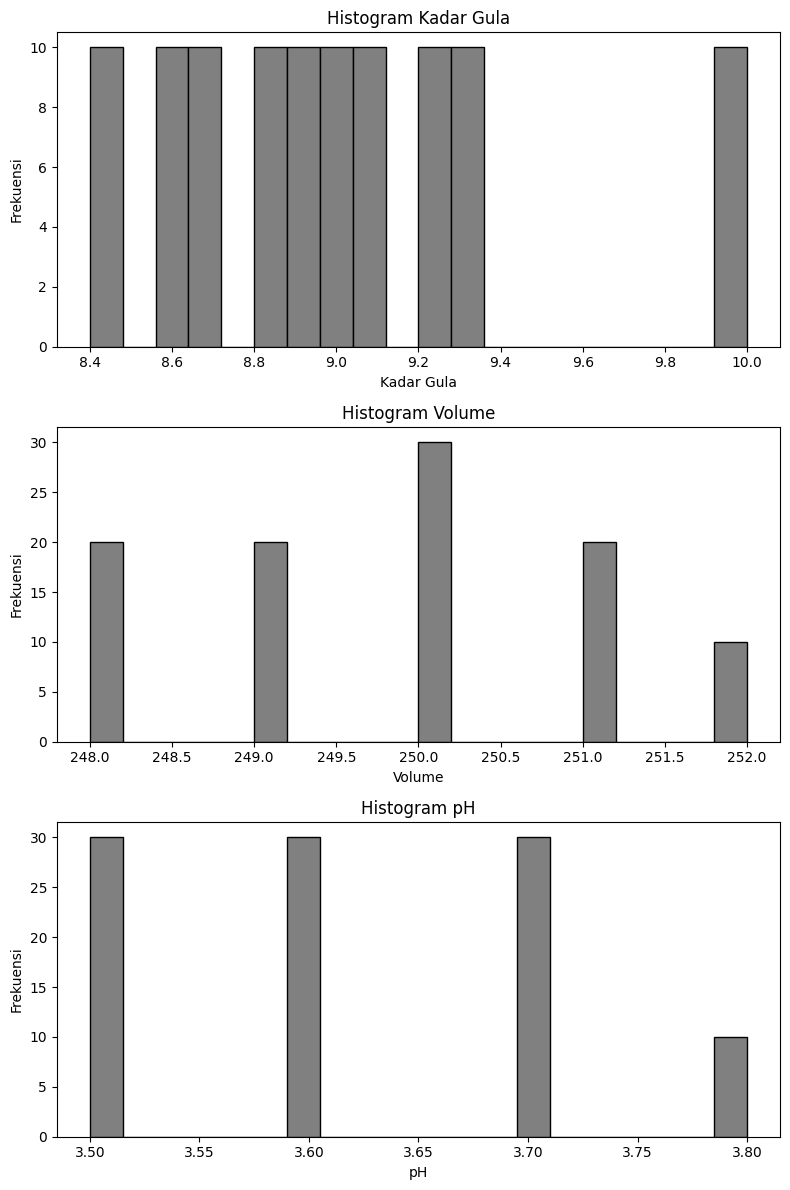

In [12]:
# Menggambarkan histogram untuk setiap variabel
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Histogram untuk kadar gula
axs[0].hist(data1['Kadar Gula'], bins=20, edgecolor='black', color='grey')
axs[0].set_title('Histogram Kadar Gula')
axs[0].set_xlabel('Kadar Gula')
axs[0].set_ylabel('Frekuensi')

# Histogram untuk volume
axs[1].hist(data1['Volume'], bins=20, edgecolor='black', color='grey')
axs[1].set_title('Histogram Volume')
axs[1].set_xlabel('Volume')
axs[1].set_ylabel('Frekuensi')

# Histogram untuk pH
axs[2].hist(data1['pH'], bins=20, edgecolor='black', color='grey')
axs[2].set_title('Histogram pH')
axs[2].set_xlabel('pH')
axs[2].set_ylabel('Frekuensi')

plt.tight_layout()
plt.show()

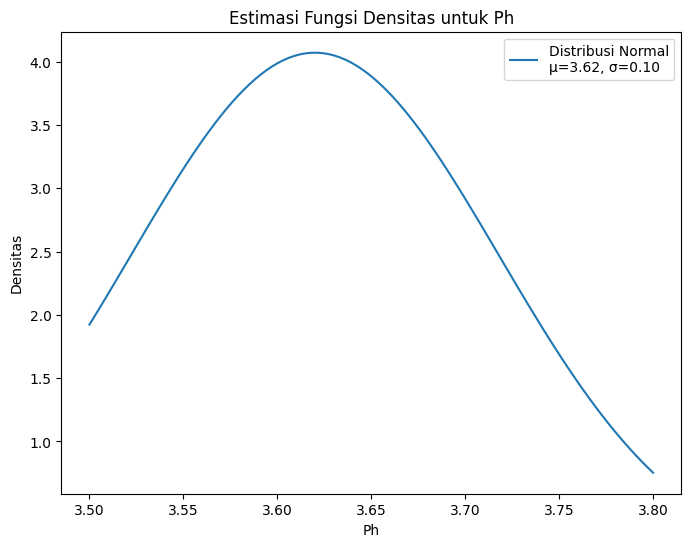

In [13]:
# Menentukan variabel dengan simpangan baku terkecil
variabel_konsisten = statistik.loc['simpangan_baku'].idxmin()
simpangan_baku_terkecil = statistik.loc['simpangan_baku', variabel_konsisten]

# Memvisualisasikan fungsi densitas untuk variabel yang paling konsisten
data_konsisten = data1[variabel_konsisten]

# Plot estimasi fungsi densitas menggunakan distribusi normal atau KDE
plt.figure(figsize=(8, 6))
if (data_konsisten.skew() < 0.5):  # Cek distribusi normal dengan melihat skewness
    # Menggunakan distribusi normal
    mu, sigma = norm.fit(data_konsisten)
    x = np.linspace(data_konsisten.min(), data_konsisten.max(), 100)
    plt.plot(x, norm.pdf(x, mu, sigma), label=f'Distribusi Normal\nμ={mu:.2f}, σ={sigma:.2f}')
else:
    # Menggunakan KDE
    sns.kdeplot(data_konsisten, label='Kernel Density Estimation')

# Mengatur judul dan label
plt.title(f'Estimasi Fungsi Densitas untuk {variabel_konsisten.capitalize()}')
plt.xlabel(variabel_konsisten.capitalize())
plt.ylabel('Densitas')
plt.legend()
plt.show()


# Interpretasi Hasil
Variabel dengan simpangan baku terkecil (pH) menunjukkan konsistensi tertinggi, yang mencerminkan bahwa proses produksi terkait variabel tersebut stabil. Jika fungsi densitas mendekati distribusi normal, maka variabel ini mengikuti pola yang simetris dan cenderung tidak mengalami variasi ekstrem. Sebaliknya, jika pola distribusi berbeda, ada kemungkinan proses tidak sepenuhnya stabil atau ada faktor luar yang menyebabkan variasi. Kestabilan proses produksi ini penting untuk memastikan bahwa produk yang dihasilkan memenuhi standar kualitas yang diharapkan, khususnya pada variabel yang dipilih sebagai indikator konsistensi tertinggi.

# **Fungsi Densitas data_tanaman.csv**

In [17]:
# Menampilkan statistik deskriptif untuk variabel Tinggi, Lebar Daun, dan Warna
statistik_deskriptif = data2[['Tinggi', 'Lebar Daun', 'Warna']].describe().T

# Menambahkan kolom rentang (range) ke statistik deskriptif
statistik_deskriptif['range'] = statistik_deskriptif['max'] - statistik_deskriptif['min']

# Menambahkan median
statistik_deskriptif['median'] = data2[['Tinggi', 'Lebar Daun', 'Warna']].median()

print(statistik_deskriptif)

            count   mean       std   min   25%    50%   75%   max  range  \
Tinggi      100.0  34.02  1.489221  31.8  32.9  33.90  35.0  36.5    4.7   
Lebar Daun  100.0  15.95  0.288675  15.5  15.7  15.95  16.2  16.4    0.9   
Warna       100.0   8.00  0.778499   7.0   7.0   8.00   9.0   9.0    2.0   

            median  
Tinggi       33.90  
Lebar Daun   15.95  
Warna         8.00  


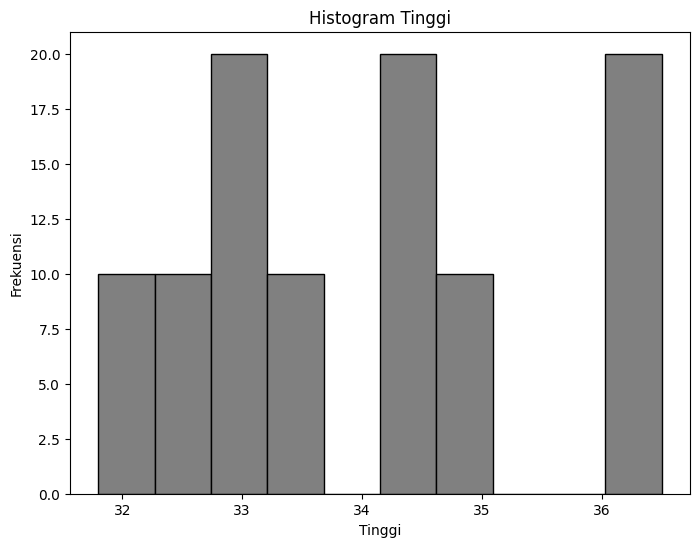

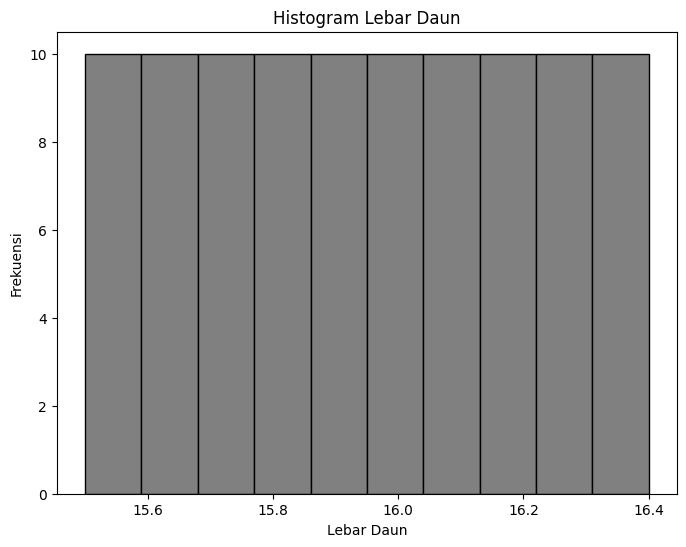

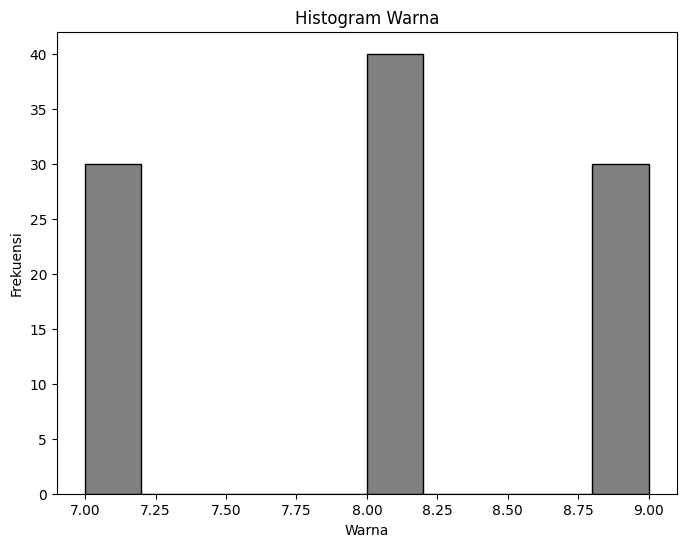

In [20]:
# Membuat histogram untuk setiap variabel
variables = ['Tinggi', 'Lebar Daun', 'Warna']
for var in variables:
    plt.figure(figsize=(8, 6))
    plt.hist(data2[var], bins=10, edgecolor='black', color='grey')
    plt.title(f'Histogram {var}')
    plt.xlabel(var)
    plt.ylabel('Frekuensi')
    plt.show()

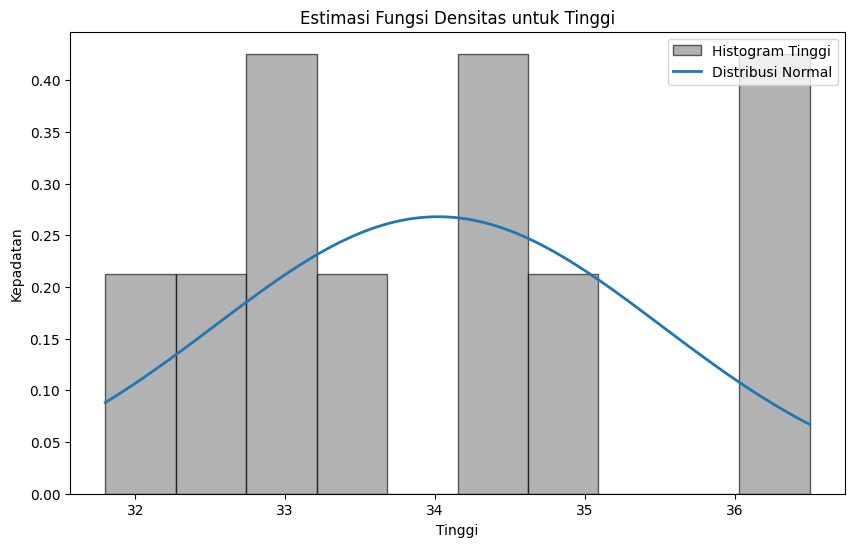

In [22]:
# Menentukan parameter distribusi normal berdasarkan data Tinggi
mean_tinggi = data2['Tinggi'].mean()
std_tinggi = data2['Tinggi'].std()

# Membuat plot fungsi densitas
plt.figure(figsize=(10, 6))
# Histogram Tinggi dengan density=True untuk menunjukkan proporsi, bukan frekuensi
plt.hist(data2['Tinggi'], bins=10, density=True, edgecolor='black', alpha=0.6, label='Histogram Tinggi', color='grey')

# Plot distribusi normal dengan parameter mean dan std dari Tinggi
x = np.linspace(data2['Tinggi'].min(), data2['Tinggi'].max(), 100)
plt.plot(x, norm.pdf(x, mean_tinggi, std_tinggi), label='Distribusi Normal', linewidth=2)

plt.title('Estimasi Fungsi Densitas untuk Tinggi')
plt.xlabel('Tinggi')
plt.ylabel('Kepadatan')
plt.legend()
plt.show()

# Interpretasi Hasil
Variasi pada tinggi tanaman, yang tampak mengikuti distribusi normal, dapat disebabkan oleh berbagai faktor alamiah atau lingkungan. Beberapa kemungkinan penyebab variasi adalah:

1. Faktor Genetik: Meski diberikan perlakuan pupuk yang seragam, variasi genetik dalam tanaman dapat menyebabkan perbedaan dalam pertumbuhan tinggi.

2. Faktor Lingkungan Mikro: Setiap tanaman mungkin mengalami sedikit perbedaan dalam intensitas cahaya, kelembaban tanah, atau sirkulasi udara yang dapat mempengaruhi pertumbuhannya.

3.  Efektivitas Penyerapan Nutrisi: Meskipun pupuk diberikan secara seragam, kemampuan setiap tanaman dalam menyerap nutrisi bisa berbeda, yang akan berdampak pada pertumbuhan.

Secara keseluruhan, hasil ini menunjukkan bahwa meskipun perlakuan pupuk seragam, variasi alami pada tinggi tanaman tetap ada dan mengikuti pola distribusi yang normal. Ini mungkin mengindikasikan faktor alamiah yang mempengaruhi pertumbuhan tanaman secara individual.

# **Fungsi Massa Peluang data_pelanggan_streaming.csv**

In [23]:
# Menampilkan statistik deskriptif untuk variabel Usia, Frekuensi Menonton, dan Durasi Menonton (Jam)
statistik_deskriptif_pelanggan = data3[['Usia', 'Frekuensi Menonton', 'Durasi Menonton (Jam)']].describe().T

# Menambahkan median
statistik_deskriptif_pelanggan['median'] = data3[['Usia', 'Frekuensi Menonton', 'Durasi Menonton (Jam)']].median()

print(statistik_deskriptif_pelanggan)

                       count     mean        std   min    25%     50%    75%  \
Usia                   100.0  37.8900  13.222948  18.0  27.00  37.000  50.50   
Frekuensi Menonton     100.0   5.2300   2.631799   1.0   3.00   5.000   7.25   
Durasi Menonton (Jam)  100.0   2.8129   1.290241   0.5   1.53   2.795   3.86   

                         max  median  
Usia                   59.00  37.000  
Frekuensi Menonton      9.00   5.000  
Durasi Menonton (Jam)   4.97   2.795  


In [24]:
# Membuat interval usia dan mengelompokkan frekuensi menonton
data3['Usia_Group'] = pd.cut(data3['Usia'], bins=[0, 20, 30, 40, 50, 60], labels=['0-20', '21-30', '31-40', '41-50', '51-60'])
data3['Frekuensi_Group'] = pd.cut(data3['Frekuensi Menonton'], bins=[0, 2, 4, 6, 8, 10], labels=['1-2', '3-4', '5-6', '7-8', '9-10'])

# Membuat tabel distribusi frekuensi bersama
tabel_frekuensi_bersama = pd.crosstab(data3['Usia_Group'], data3['Frekuensi_Group'])
print(tabel_frekuensi_bersama)

Frekuensi_Group  1-2  3-4  5-6  7-8  9-10
Usia_Group                               
0-20               1    5    1    2     2
21-30              4   11    2    2     4
31-40              3    8    3    5     3
41-50              1    7    3    1     7
51-60              6    2    6    9     2


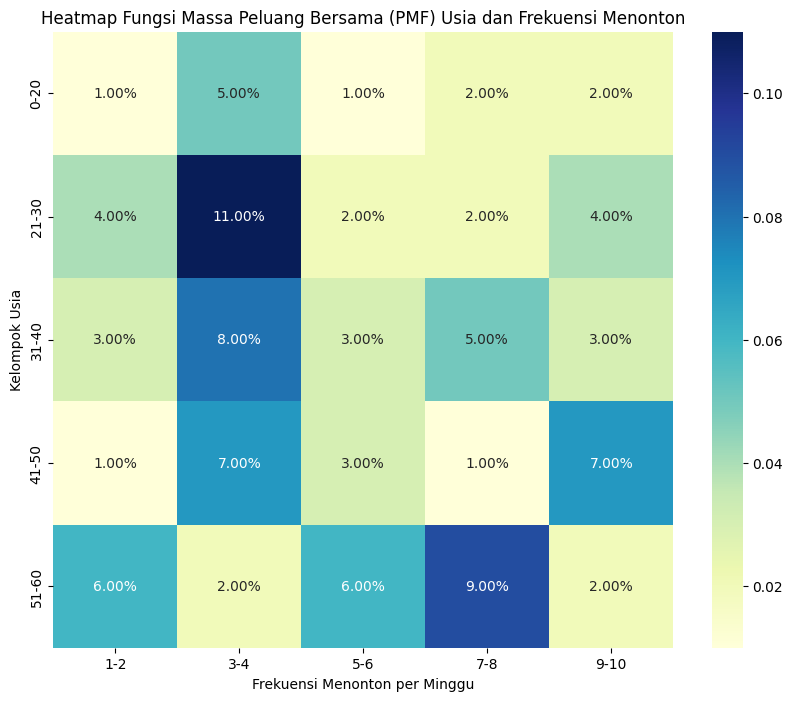

In [25]:
# Menghitung fungsi massa peluang bersama (PMF) dengan membagi tiap frekuensi dengan total pengamatan
pmf_frekuensi_bersama = tabel_frekuensi_bersama / tabel_frekuensi_bersama.values.sum()

# Membuat heatmap untuk visualisasi distribusi peluang bersama
plt.figure(figsize=(10, 8))
sns.heatmap(pmf_frekuensi_bersama, annot=True, cmap="YlGnBu", fmt=".2%")
plt.title('Heatmap Fungsi Massa Peluang Bersama (PMF) Usia dan Frekuensi Menonton')
plt.xlabel('Frekuensi Menonton per Minggu')
plt.ylabel('Kelompok Usia')
plt.show()

# Interpretasi Hasil
Dari heatmap tersebut, kita dapat mengidentifikasi kelompok dengan probabilitas tertinggi, yaitu kelompok usia dan frekuensi menonton yang paling sering ditemukan di data:

1. Kelompok dengan PMF Tertinggi:
Usia 21-30 dan Frekuensi Menonton pada kisaran 3-4 kali per minggu tampak memiliki peluang tertinggi di antara kombinasi lainnya.

2. Implikasi bagi Strategi Konten:
Dengan mengetahui bahwa pelanggan berusia 21-30 tahun dengan frekuensi menonton 3-4 kali per minggu memiliki keterlibatan tinggi, layanan streaming dapat mengembangkan konten yang lebih sesuai untuk kelompok usia ini. Meningkatkan fokus pada promosi atau rekomendasi untuk kategori ini mungkin akan meningkatkan retensi dan keterlibatan, khususnya jika konten difokuskan pada minat kelompok usia tersebut.

Temuan ini dapat menjadi landasan bagi layanan streaming untuk mengarahkan strategi konten yang lebih sesuai dengan profil pengguna yang paling terlibat. ​​









# **Fungsi Massa Peluang data_pembelian_konsumen.csv**

In [26]:
# Menampilkan statistik deskriptif untuk variabel Frekuensi Belanja dan Total Pengeluaran (Ribu IDR)
statistik_deskriptif_pembelian = data4[['Frekuensi Belanja', 'Total Pengeluaran (Ribu IDR)']].describe().T

# Menambahkan median
statistik_deskriptif_pembelian['median'] = data4[['Frekuensi Belanja', 'Total Pengeluaran (Ribu IDR)']].median()

print(statistik_deskriptif_pembelian)

                              count      mean         std    min       25%  \
Frekuensi Belanja             100.0    4.9300    2.712690   1.00    2.7500   
Total Pengeluaran (Ribu IDR)  100.0  285.4553  135.501152  50.18  166.2425   

                                 50%       75%     max  median  
Frekuensi Belanja               5.00    7.2500    9.00    5.00  
Total Pengeluaran (Ribu IDR)  303.07  410.0625  494.88  303.07  


In [27]:
# Mengelompokkan Frekuensi Belanja ke dalam kategori interval
data4['Frekuensi_Group'] = pd.cut(data4['Frekuensi Belanja'], bins=[0, 2, 4, 6, 8, 10], labels=['1-2', '3-4', '5-6', '7-8', '9-10'])

# Membuat tabel distribusi frekuensi bersama antara Kategori Produk dan Frekuensi Belanja
tabel_frekuensi_bersama_pembelian = pd.crosstab(data4['Kategori Produk'], data4['Frekuensi_Group'])

print(tabel_frekuensi_bersama_pembelian)

Frekuensi_Group  1-2  3-4  5-6  7-8  9-10
Kategori Produk                          
Makanan           10    4    6    8     6
Minuman            7   10   11    6     4
Rumah Tangga       8    5    6    7     2


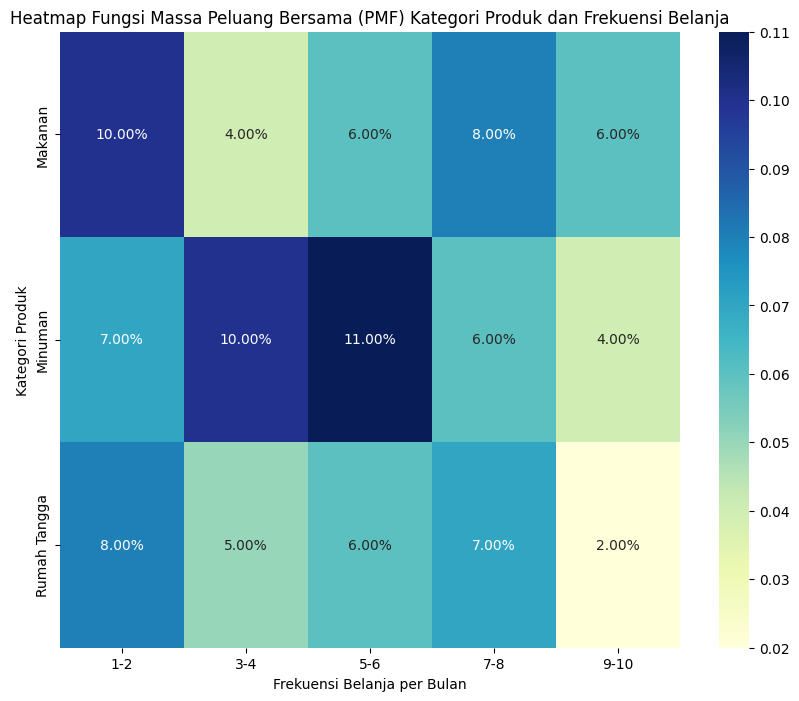

In [28]:
# Menghitung fungsi massa peluang bersama (PMF) dengan membagi tiap frekuensi dengan total pengamatan
pmf_frekuensi_bersama_pembelian = tabel_frekuensi_bersama_pembelian / tabel_frekuensi_bersama_pembelian.values.sum()

# Membuat heatmap untuk visualisasi distribusi peluang bersama
plt.figure(figsize=(10, 8))
sns.heatmap(pmf_frekuensi_bersama_pembelian, annot=True, cmap="YlGnBu", fmt=".2%")
plt.title('Heatmap Fungsi Massa Peluang Bersama (PMF) Kategori Produk dan Frekuensi Belanja')
plt.xlabel('Frekuensi Belanja per Bulan')
plt.ylabel('Kategori Produk')
plt.show()


# Interpretasi Hasil
Berdasarkan heatmap, kita dapat mengidentifikasi pola-pola berikut:

1. Produk dan Frekuensi Belanja yang Dominan:
* Minuman dengan Frekuensi Belanja 5-6 kali per bulan memiliki nilai PMF yang tinggi, menunjukkan bahwa konsumen sering membeli kategori ini dengan frekuensi tersebut.
* Makanan dengan frekuensi 7-8 kali per bulan juga memiliki nilai peluang yang signifikan.

2. Implikasi bagi Strategi Pemasaran:
* Toko dapat meningkatkan promosi untuk produk minuman dengan mengutamakan penawaran khusus bagi konsumen yang berbelanja sekitar 5-6 kali per bulan, seperti diskon atau paket minuman.
*nUntuk produk makanan, kampanye yang mendorong pembelian rutin dalam rentang frekuensi menengah hingga tinggi (7-8 kali per bulan) bisa menjadi cara yang efektif untuk meningkatkan keterlibatan.

Temuan ini dapat membantu toko dalam mengarahkan strategi pemasaran yang lebih spesifik, dengan memfokuskan promosi pada produk dan pola pembelian yang paling dominan. ​​







